In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# print the shape of data

In [4]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

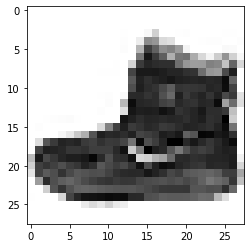

In [9]:
plt.imshow(X_train[0],cmap='Greys')

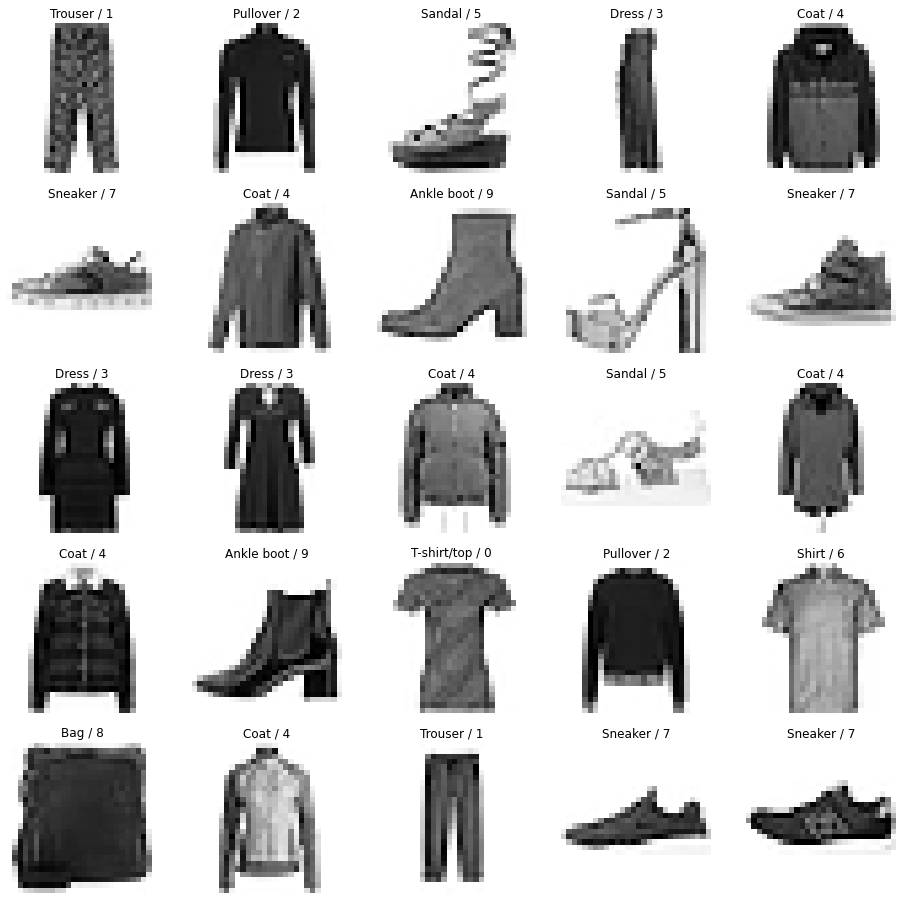

In [10]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)

In [13]:
X_train.ndim

4

In [14]:
X_test=np.expand_dims(X_test,-1)

In [15]:
# feature scaling

In [16]:
X_train = X_train/255
X_test= X_test/255

In [17]:
# Split dataset

In [18]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [19]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [20]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 22s 196ms/step - loss: 0.6494 - accuracy: 0.7776 - val_loss: 0.4563 - val_accuracy: 0.8365
Epoch 2/10
94/94 [==============================] - 18s 192ms/step - loss: 0.3792 - accuracy: 0.8660 - val_loss: 0.3842 - val_accuracy: 0.8633
Epoch 3/10
94/94 [==============================] - 17s 177ms/step - loss: 0.3278 - accuracy: 0.8850 - val_loss: 0.3286 - val_accuracy: 0.8851
Epoch 4/10
94/94 [==============================] - 15s 163ms/step - loss: 0.2977 - accuracy: 0.8955 - val_loss: 0.3093 - val_accuracy: 0.8934
Epoch 5/10
94/94 [==============================] - 15s 163ms/step - loss: 0.2761 - accuracy: 0.9016 - val_loss: 0.2979 - val_accuracy: 0.8943
Epoch 6/10
94/94 [==============================] - 16s 168ms/step - loss: 0.2583 - accuracy: 0.9082 - val_loss: 0.2870 - val_accuracy: 0.8988
Epoch 7/10
94/94 [==============================] - 15s 164ms/step - loss: 0.2441 - accuracy: 0.9124 - val_loss: 0.2788 - val_accuracy: 0.9013

In [24]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.03, 0.  ]], dtype=float32)

In [25]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2768 - accuracy: 0.8999


[0.2767951786518097, 0.8999000191688538]

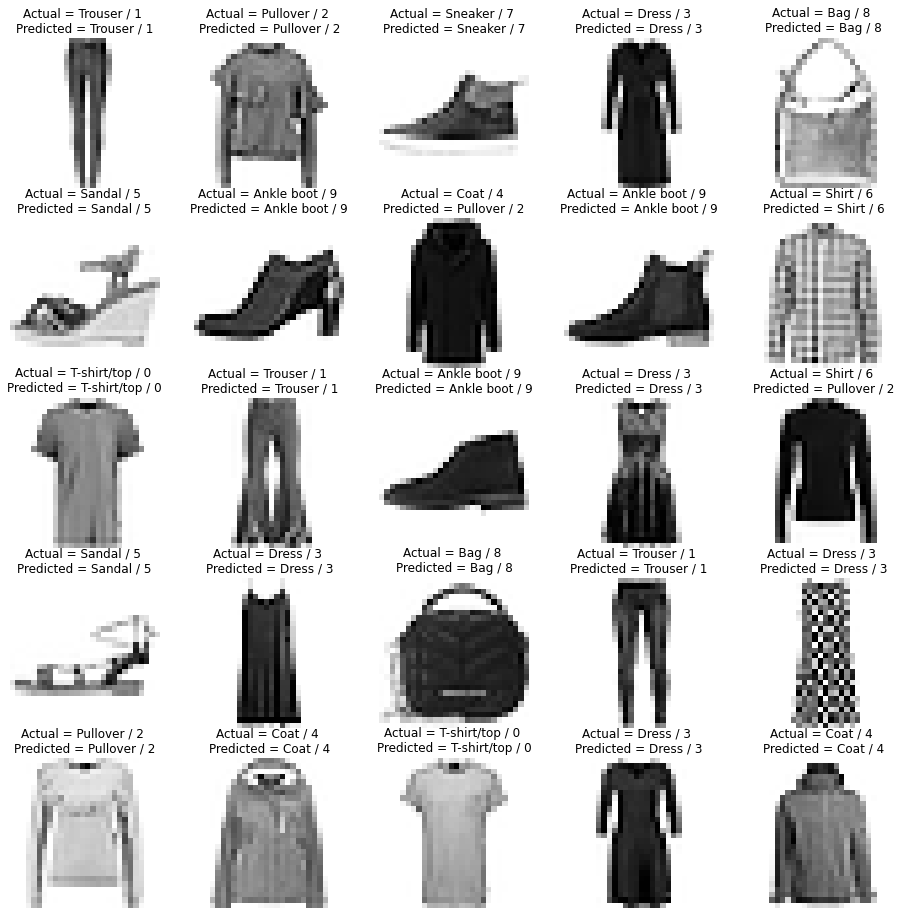

In [27]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

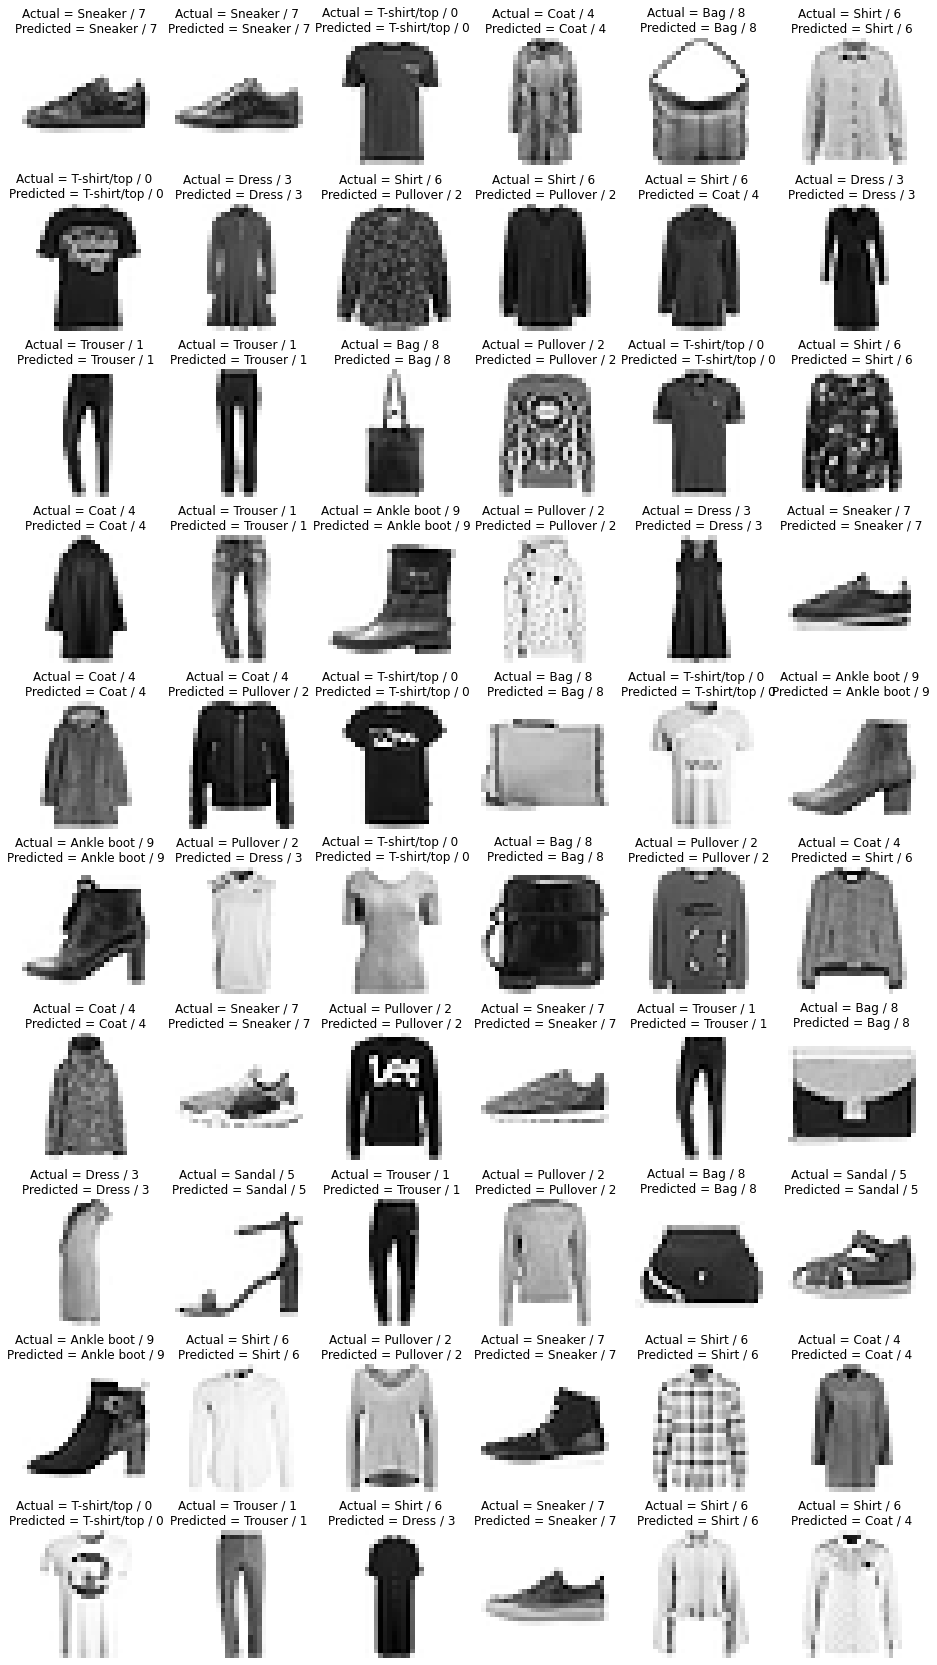

In [28]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [29]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.89      0.83      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.80      0.66      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



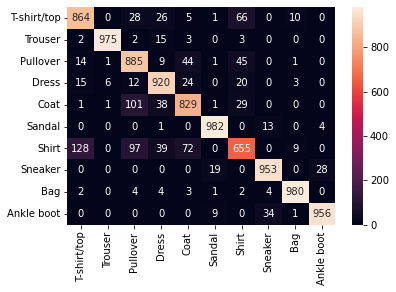

In [31]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [32]:
"""# Save Model"""

'# Save Model'

In [33]:
model.save('fashion_mnist_cnn_model.h5')

In [34]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 25s 219ms/step - loss: 1.0574 - accuracy: 0.6081 - val_loss: 0.5992 - val_accuracy: 0.7680
Epoch 2/20
94/94 [==============================] - 26s 275ms/step - loss: 0.5638 - accuracy: 0.7881 - val_loss: 0.4665 - val_accuracy: 0.8258
Epoch 3/20
94/94 [==============================] - 22s 237ms/step - loss: 0.4607 - accuracy: 0.8313 - val_loss: 0.4132 - val_accuracy: 0.8457
Epoch 4/20
94/94 [==============================] - 19s 201ms/step - loss: 0.4042 - accuracy: 0.8518 - val_loss: 0.3691 - val_accuracy: 0.8652
Epoch 5/20
94/94 [==============================] - 19s 197ms/step - loss: 0.3719 - accuracy: 0.8634 - val_loss: 0.3445 - val_accuracy: 0.8726
Epoch 6/20
94/94 [==============================] - 20s 208ms/step - loss: 0.3455 - accuracy: 0.8731 - val_loss: 0.3344 - val_accuracy: 0.8764
Epoch 7/20
94/94 [==============================] - 20s 213ms/step - loss: 0.3278 - accuracy: 0.8803 - val_loss: 0.3140 - val_accuracy: 0.8842

94/94 [==============================] - 71s 752ms/step - loss: 0.0749 - accuracy: 0.9740 - val_loss: 0.3939 - val_accuracy: 0.9047
Epoch 39/50
94/94 [==============================] - 63s 669ms/step - loss: 0.0755 - accuracy: 0.9743 - val_loss: 0.4450 - val_accuracy: 0.9014
Epoch 40/50
94/94 [==============================] - 66s 707ms/step - loss: 0.0740 - accuracy: 0.9736 - val_loss: 0.4203 - val_accuracy: 0.9051
Epoch 41/50
94/94 [==============================] - 61s 647ms/step - loss: 0.0705 - accuracy: 0.9751 - val_loss: 0.4064 - val_accuracy: 0.9071
Epoch 42/50
94/94 [==============================] - 61s 649ms/step - loss: 0.0590 - accuracy: 0.9793 - val_loss: 0.4602 - val_accuracy: 0.9068
Epoch 43/50
94/94 [==============================] - 74s 786ms/step - loss: 0.0674 - accuracy: 0.9762 - val_loss: 0.4081 - val_accuracy: 0.9087
Epoch 44/50
94/94 [==============================] - 74s 787ms/step - loss: 0.0637 - accuracy: 0.9773 - val_loss: 0.4614 - val_accuracy: 0.9058
Epoc

[0.49179527163505554, 0.901199996471405]